# California Housing Prices - Clustering

The aim of this workbook is to use KMeans to aggregate the California Housing Prices Dataset based on a variety of pairwise factors.

- url : https://www.kaggle.com/datasets/camnugent/california-housing-prices

We will be using the elbow method to determine the optimal k using sum of squared distances (inertia).

## Lib Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data Loading

In [3]:
housing_df = pd.read_csv('housing.csv')

In [4]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.isna().sum() * 100 / len(housing_df)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

So there only seem to be missing entries for total_bedrooms, and the missing values account for 1.% of values, which is insignificant. I'm going to quickly review the object column ocean_property to make sure there aren't any missing values there either.

In [6]:
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Seems fine so I will drop all missing values from the dataframe.

In [7]:
housing_df.dropna(inplace=True)
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Now I am going to have a review of the numerical features.

In [9]:
NUMERICAL_COLS = [col for col in housing_df.columns if housing_df[col].dtype != 'object']

In [10]:
housing_df[NUMERICAL_COLS].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

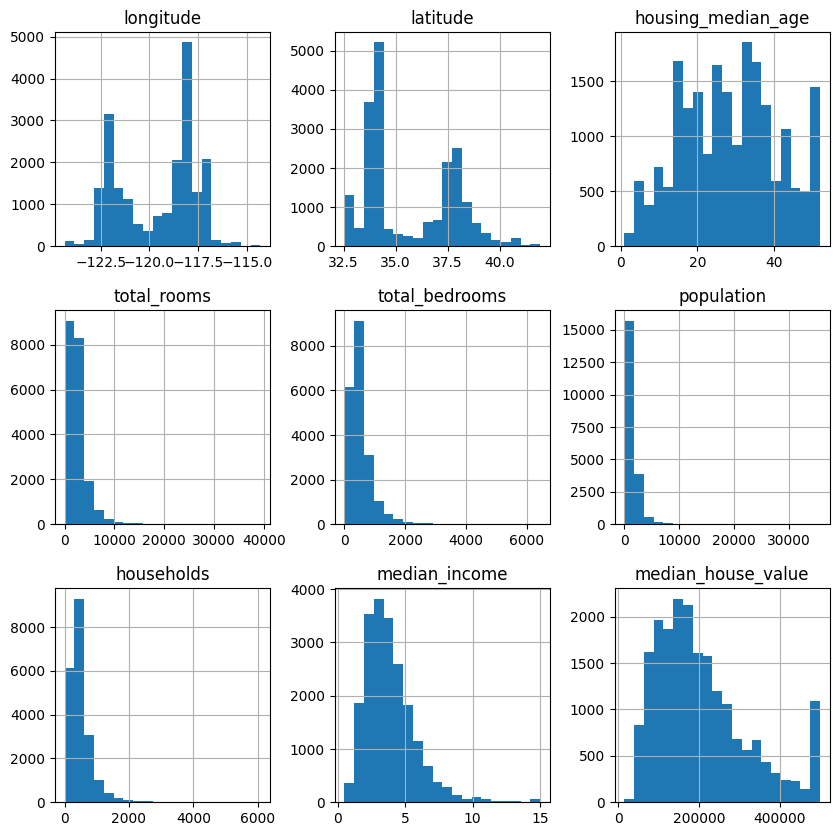

In [11]:
housing_df[NUMERICAL_COLS].hist(bins=20, figsize=(10, 10))

Alot of the numerical columns are exhibiting positive skewness, with the mode value being less than the mean. As such the dataset will have to be normalized prior to any clustering.

## 2. EDA

__Latitude vs Longitude Scatter__

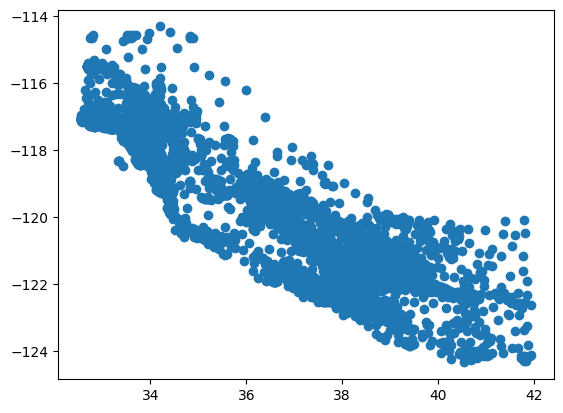

In [12]:
plt.scatter(housing_df['latitude'], housing_df['longitude'])

__Median Income vs Median House Value__

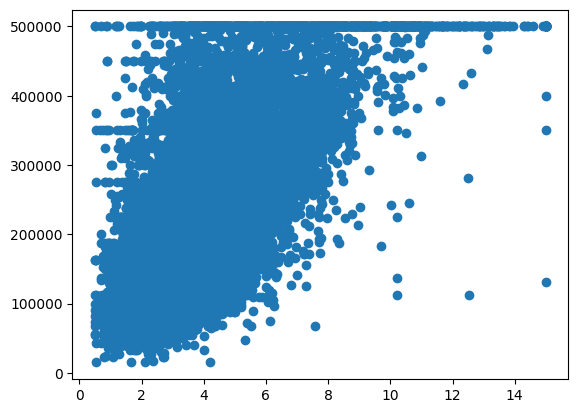

In [13]:
plt.scatter(housing_df['median_income'], housing_df['median_house_value'])

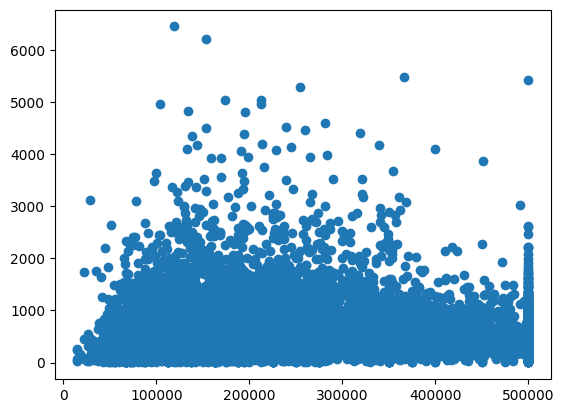

In [14]:
plt.scatter(housing_df['median_house_value'], housing_df['total_bedrooms'])

__A Note On Feature Scaling__

The k-means algorithm is sensitive to scale. Given this, the last two Clustering Pairs will need to be scaled as their values are not directly comparable.

## 3. Clustering

__Clustering Helpers__

In [15]:
def plot_n_clusters_vs_inertia(X, cluster_cols):
    """_summary_

    Args:
        X (_type_): _description_
        cluster_cols (_type_): _description_
    """
    assert(len(cluster_cols) == 2)
    n_clusters = list(range(1, 15))
    inertias = []

    for cluster in n_clusters:
        k_means = KMeans(n_clusters=cluster)
        k_means.fit(X)
        inertias.append(k_means.inertia_)

    fig, ax = plt.subplots()
    ax.plot(n_clusters, inertias, marker='x')
    ax.set(xlabel='N Clusters', ylabel="Inertia", title=f"N Clusters vs Inertia for {cluster_cols[0]} and {cluster_cols[1]}")
    plt.show()

def display_cluster(x, km, num_clusters):
    color = 'brgcmky'
    
    for i in range(num_clusters):
        labels1 = x.iloc[km.labels_ == i, 0]
        labels2 = x.iloc[km.labels_ == i, 1]
        centers1 = km.cluster_centers_[i][0]
        centers2 = km.cluster_centers_[i][1]
        color_index = i % len(color)
        plt.scatter(labels1, labels2, c=color[color_index], alpha=0.5, s=20)
        plt.scatter(centers1, centers2, c=color[color_index], marker='x', s=100)


### 3.1 Latitude and Longitude Clustering

In [16]:
CLUSTERING_COLS = ['latitude', 'longitude']

In [17]:
X = housing_df[CLUSTERING_COLS]

In [18]:
X.head()

,latitude,longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25


Determining the optimal n_clusters for latitude and longitude.

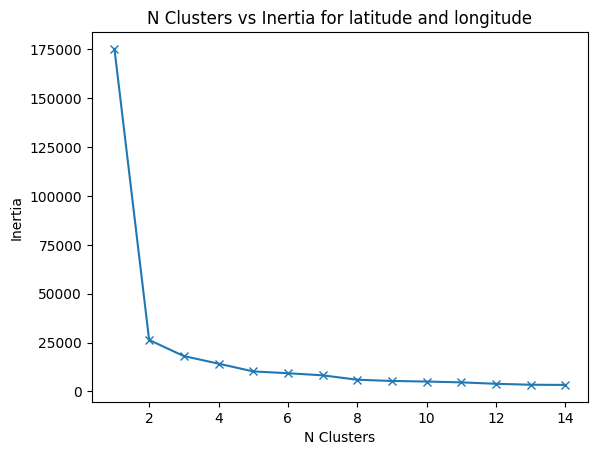

In [19]:
plot_n_clusters_vs_inertia(X, CLUSTERING_COLS)

So the optimal n_cluster value for latitude and longitude appears to be around 6.

In [20]:
NUM_CLUSTERS = 7

In [21]:
km = KMeans(NUM_CLUSTERS)
km.fit(X)

KMeans(n_clusters=7)

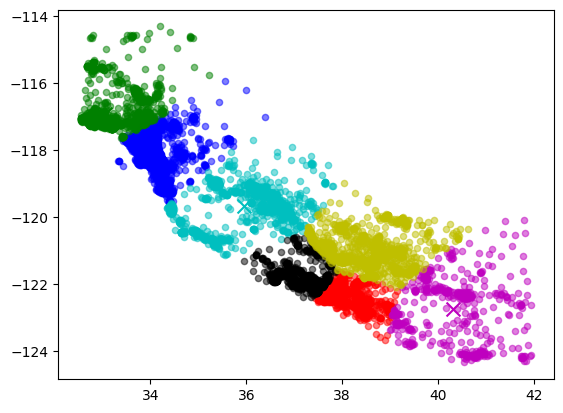

In [22]:
display_cluster(x=X, km=km, num_clusters=NUM_CLUSTERS)

In [23]:
X['clusters'] = km.labels_
X['median_income'] = housing_df['median_income']

/tmp/ipykernel_24625/1362094699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clusters'] = km.labels_
/tmp/ipykernel_24625/1362094699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['median_income'] = housing_df['median_income']


In [24]:
X.head()

,latitude,longitude,clusters,median_income
0,37.88,-122.23,1,8.3252
1,37.86,-122.22,1,8.3014
2,37.85,-122.24,1,7.2574
3,37.85,-122.25,1,5.6431
4,37.85,-122.25,1,3.8462


### 3.3 Analysis of Dataset based on Clustering

In [25]:
sns.catplot(x='median_income', y='clusters', data=X, height=6)

KeyboardInterrupt: 